In [519]:
import pandas as pd
data = pd.read_csv('data/task2.1.csv', index_col=0)

In [520]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(data[["X"]], data["Y"])

1. *Определите выборочное среднее `X`:*

In [521]:
print(data["X"].mean())

12.0


2. *Определите выборочное среднее `Y`:*

In [522]:
print(data["Y"].mean())

27.6


3. *Найдите коэффициент `theta_1`:*

In [523]:
print(round(model.coef_[0], 2))

2.32


4. *Найдите коэффициент `theta_0`:*

In [524]:
print(round(model.intercept_, 2))

-0.2


5. *Оцените точность модели, вычислив `R^2` статистику:*

In [525]:
round(model.score(data[["X"]], data["Y"]), 2)

0.86

# Задача 2
Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

ВАЖНО: Задания с подробными пояснениями представлены в блокноте. Выполняя задания в блокноте, следует вводить полученные ответы в соответствующие поля ввода ниже. Рекомендуем вводить ответы поэтапно, для этого специально предусмотрено достаточное количество попыток.

При помощи `train_test_split()` разбейте набор данных на обучающую и тестовую выборки с параметрами `test_size=0.2, random_state=33`. Используйте стратификацию по колонке `Species`. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [526]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/fish_train.csv')
species = data["Species"].copy()
data.drop(["Species"], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.drop("Weight", axis=1), data["Weight"], test_size=0.2, random_state=33, stratify=species)

*Вычислите выборочное среднее колонки Width полученной тренировочной выборки.*

In [527]:
print(round(X_train["Width"].mean(), 3))

4.511


### 1. **Построение базовой модели**
Избавьтесь от категориальных признаков и обучите модель линейной регрессии (`LinearRegression()`) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. 
Оцените модель при помощи метрики `r2_score()`.
*Введите r2_score() полученной модели.*

In [528]:
from sklearn.metrics import r2_score
def trainAndScore(X_train, X_test, y_train, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(round(r2_score(y_test, y_pred), 3))
    
trainAndScore(X_train, X_test, y_train, y_test)

0.879


### 2. **Добавление предварительной обработки признаков.**
Использование PCA.

*Перечислите через запятую и пробел тройку отбрасываемых наиболее коррелированных признаков.*

In [529]:
corr_matrix = data.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]
corr_pairs = corr_pairs.drop_duplicates()
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_corr_pairs.head(3)

Length1  Length2    0.999457
Length2  Length3    0.993469
Length1  Length3    0.991043
dtype: float64

*Обучите модель PCA для трех наиболее коррелированных признаков на тренировочных данных. Примените полученное преобразование для тренировочных и тестовых данных. Введите долю объясненной дисперсии при использовании только первой главной компоненты.*

In [530]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full', n_components=1)
length_train = pca.fit_transform(X_train[["Length1", "Length2", "Length3"]])
length_test = pca.transform(X_test[["Length1", "Length2", "Length3"]])
print(round(pca.explained_variance_ratio_[0], 3))

0.996


*Замените тройку наиболее коррелированных признаков на полученный признак `Lengths`, значения которого совпадают со счетами первой главной компоненты. Обучите модель линейной регрессии. Введите `r2_score()` полученной модели.*

In [531]:
X_train.drop(["Length1", "Length2", "Length3"], axis=1, inplace=True)
X_train["Lengths"] = length_train
X_test.drop(["Length1", "Length2", "Length3"], axis=1, inplace=True)
X_test["Lengths"] = length_test
trainAndScore(X_train, X_test, y_train, y_test)

0.875


**Модификация признаков.**
Используя полученный на предыдущем этапе набор данных, возведите в куб значения признаков `Width`, `Height`, `Lengths`.

Text(0.5, 1.0, 'До преобразований')

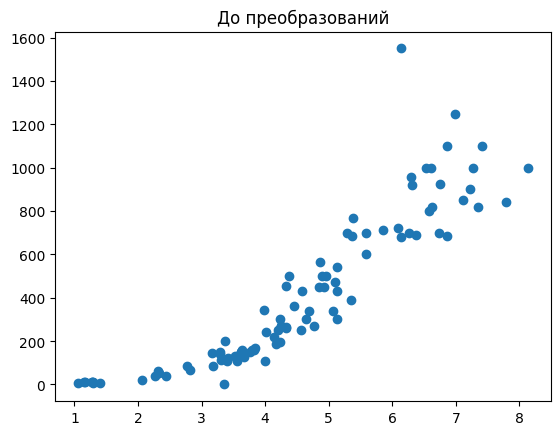

In [532]:
import matplotlib.pyplot as plt
plt.scatter(X_train["Width"], y_train)
plt.title("До преобразований")

*Введите выборочное среднее колонки `Width` тренировочного набора данных после возведения в куб.*

In [533]:
X_train_new = X_train.copy()
X_train_new[["Width", "Height", "Lengths"]] = X_train_new[["Width", "Height", "Lengths"]]**3
X_test_new = X_test.copy()
X_test_new[["Width", "Height", "Lengths"]] = X_test_new[["Width", "Height", "Lengths"]]**3
print(round(X_train_new["Width"].mean(), 3))

130.74


*Введите номер изображения, соответствующего зависимости `Weight` от `Width` после преобразования.*

Text(0.5, 1.0, 'После преобразований')

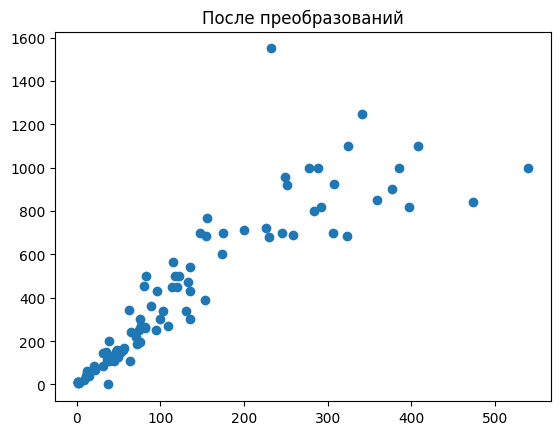

In [534]:
plt.scatter(X_train_new["Width"], y_train)
plt.title("После преобразований")

*Обучите модель линейнной регрессии. Введите `r2_score()` полученной модели.*

In [535]:
trainAndScore(X_train_new, X_test_new, y_train, y_test)

0.952


**Добавление категориальных признаков.**

Добавьте к набору данных, полученному на предыдущем этапе, ранее исключенные категориальные признаки, предварительно произведя `one-hot` кодирование при помощи `pd.get_dummies()`. Обучите модель регрессии. Введите `r2_score()` полученной модели.

In [536]:
dummies_species = pd.get_dummies(species)
X_train_new_ds = pd.concat([X_train_new, dummies_species], axis=1, join='inner')
X_test_new_ds = pd.concat([X_test_new, dummies_species], axis=1, join='inner')
trainAndScore(X_train_new_ds, X_test_new_ds, y_train, y_test)

0.945


Закодируйте категориальные признаки при помощи `pd.get_dummies(drop_first=True)`. Введите `r2_score()` модели после избавления от коррелированности.

In [537]:
dummies_species = pd.get_dummies(species, drop_first=True)
X_train_new_ds_new = pd.concat([X_train_new, dummies_species], axis=1, join='inner')
X_test_new_ds_new = pd.concat([X_test_new, dummies_species], axis=1, join='inner')
trainAndScore(X_train_new_ds_new, X_test_new_ds_new, y_train, y_test)

0.945


# Задача 3
Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. В качестве метрики используется `r2_score`. В зависмости от `r2_score` ваши баллы за выполнение задания вычисляются согласно следующему соотношению

In [538]:
data = pd.read_csv('data/fish_train.csv')
y_train = data["Weight"]
X_train = data.drop("Weight", axis=1)

X_test = pd.read_csv('data/fish_reserved.csv')

pca = PCA(svd_solver='full', n_components=3)
length_train = pca.fit_transform(X_train[["Length1", "Length2", "Length3"]])
length_test = pca.transform(X_test[["Length1", "Length2", "Length3"]])
X_train.drop(["Length1", "Length2", "Length3"], axis=1, inplace=True)
X_train["Lengths"] = length_train[:, 0]
X_test.drop(["Length1", "Length2", "Length3"], axis=1, inplace=True)
X_test["Lengths"] = length_test[:, 0]

# X_train["Width"] = X_train["Width"]**1
# X_test["Width"] = X_test["Width"]**1
# X_train["Height"] = X_train["Height"]**1
# X_test["Height"] = X_test["Height"]**1
X_train["Lengths"] = X_train["Lengths"]**2
X_test["Lengths"] = X_test["Lengths"]**2

dummies_species_train = pd.get_dummies(X_train["Species"], drop_first=True)
X_train.drop("Species", axis=1, inplace=True)
X_train = pd.concat([X_train, dummies_species_train], axis=1, join='inner')
dummies_species_test = pd.get_dummies(X_test["Species"], drop_first=True)
X_test.drop("Species", axis=1, inplace=True)
X_test = pd.concat([X_test, dummies_species_test], axis=1, join='inner')

model = LinearRegression().fit(X_train, y_train)

# y_pred = model.predict(X_train)
# print(r2_score(y_train, y_pred))

y_pred = model.predict(X_test)
print([float(i) for i in y_pred])

[85.05452510521548, 174.17035186986368, 123.70361652809788, 99.3701379539084, 41.434892673245486, 216.21482291170673, 77.19181168581667, 455.43671920429915, 368.76269077109805, 130.46115282510914, 1820.9484560680278, 151.70026115387645, 623.1745876197817, 1030.9497585093577, 18.959827536929197, 626.740625461344, 97.41212958926678, 807.8205176974241, 1437.2361790586162, 81.31736011700832, 612.2210418175616, 204.62035647132404, 111.8110836213989, 167.55763246486595, 269.7451940791318, 624.3858916857059, 368.9510882067318, -6.558722395634959, 16.569745675921013, -1.1983513190771191, 957.7340787469841, 510.3898563554569, 561.2991461251554, 176.858252386314, -23.194428865935606, 52.20404615465975, 132.65062378609286, 922.4644656090054, 751.2961936319721, 133.76890522811095]
